In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link = 'https://raw.githubusercontent.com/murpi/wilddata/master/quests/churn_telecom.csv'

pinky = pd.read_csv(link)

In [3]:
pinky.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
pinky.shape

(7043, 21)

In [5]:
pinky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#transformer totalCharges en float
pinky['TotalCharges'] = pd.to_numeric(pinky['TotalCharges'], errors='coerce').astype(float)

In [7]:
pinky.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
pinky.loc[pinky['TotalCharges'].isna(), :]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,Yes
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,Yes
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,Yes
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,Yes
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,Yes
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,Yes
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,Yes
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,Yes
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
pinky.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
pinky['Churn'].value_counts()

Churn
No     4824
Yes    2219
Name: count, dtype: int64

In [11]:
churn_nb = pinky.loc[pinky['Churn'] == 'Yes', 'customerID'].count()
churn_nb

2219

In [12]:
total_nb_customers = pinky['customerID'].count()
total_nb_customers

7043

In [13]:
#taux d'attrition (= résiliation)
churn_rate =  round(churn_nb / total_nb_customers, 2)
print(f"le taux d'attrition de Pinky est de {churn_rate}")

le taux d'attrition de Pinky est de 0.32


Environ 1/3 tiers des clients ont résilié leur abonnement cette année

ANALYSE DESCRIPTIVE DU FICHIER

In [14]:
#isoler dans un df les clients ayant résiliés
churning_customers = pinky.loc[pinky['Churn'] == 'Yes', :]

In [15]:
churning_customers['SeniorCitizen'].value_counts(normalize=True)

SeniorCitizen
0    0.770617
1    0.229383
Name: proportion, dtype: float64

Si 0 == False et 1 == True alors 77% des clients qui ont résilié leur abonnement cette année ne sont pas des seniors
L'age peut donc être un facteur déterminant

In [16]:
churn_senior = churning_customers['SeniorCitizen'].value_counts(normalize=True)
churn_senior = churn_senior.reset_index()

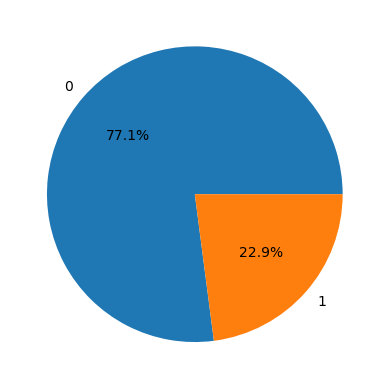

In [17]:
plt.pie(churn_senior['proportion'], labels=churn_senior['SeniorCitizen'], autopct='%1.1f%%');

In [18]:
churning_customers['gender'].value_counts(normalize=True)

gender
Male      0.501577
Female    0.498423
Name: proportion, dtype: float64

Le sexe n'est pas un élément déterminant dans le fait de résilier ou non son abonnement car 50% sont des hommes et 49.80% sont des femmes

In [19]:
churning_customers['Partner'].value_counts(normalize=True)

Partner
No     0.662461
Yes    0.337539
Name: proportion, dtype: float64

La fidélisation peut aussi être déterminante car 66% des clients ayant résilié n'était pas "partenaires" de Pinky

In [20]:
churn_dep = churning_customers['Dependents'].value_counts(normalize=True)
churn_dep = churn_dep.reset_index()

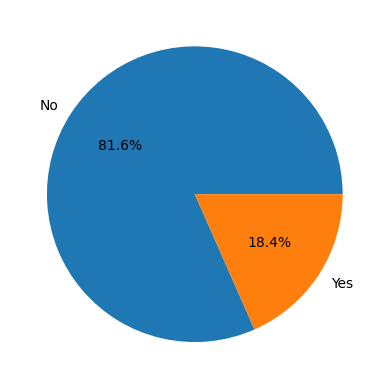

In [21]:
plt.pie(churn_dep['proportion'], labels=churn_dep['Dependents'], autopct='%1.1f%%');

In [22]:
churn_phoneS = churning_customers['PhoneService'].value_counts(normalize=True)
churn_phoneS = churn_phoneS.reset_index()
churn_phoneS

,PhoneService,proportion
0,Yes,0.906264
1,No,0.093736


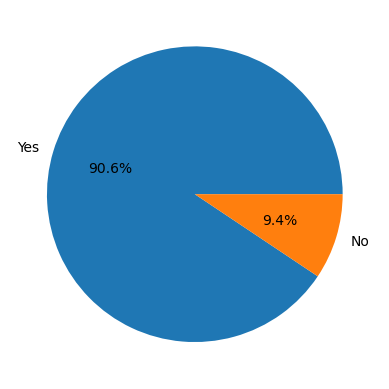

In [23]:
plt.pie(churn_phoneS['proportion'], labels=churn_phoneS['PhoneService'], autopct='%1.1f%%');

la suite de l'analyse descriptive est faite sur Power BI

CHERCHER DES CORRELATIONS

In [24]:
#Enlever la colonne 'client_ID' au df puis basculer en numeric pour chercher correlation (heatmap)
pinky_corr = pinky.drop(columns='customerID')

In [25]:
pinky_corr_num = pinky_corr.apply(lambda x: pd.factorize(x)[0])

<Axes: >

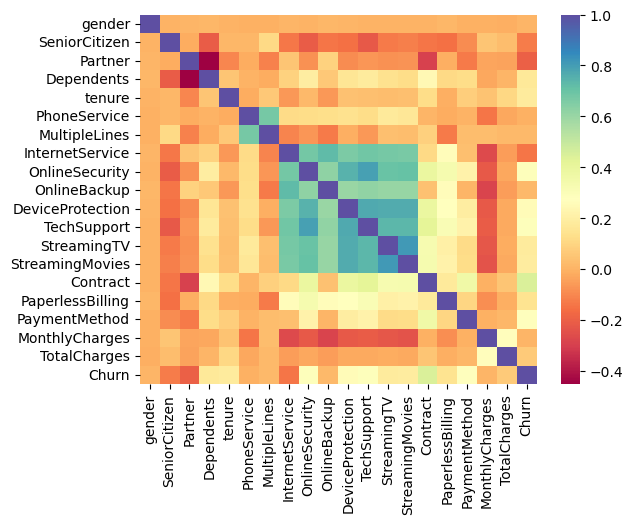

In [26]:
sns.heatmap(pinky_corr_num.corr(), cmap='Spectral')

AUTRE APPROCHE AVEC GET_DUMMIES

In [27]:
#Enlever la colonne 'client_ID' au df puis basculer en numeric pour chercher correlation (heatmap)
pinky_corr2 = pinky.drop(columns='customerID')
pinky_corr2_dum = pd.get_dummies(pinky_corr2, dtype=float)

In [28]:
pinky_corr2_dum

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7039,0,72,103.20,7362.90,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7040,0,11,29.60,346.45,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,1,4,74.40,306.60,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


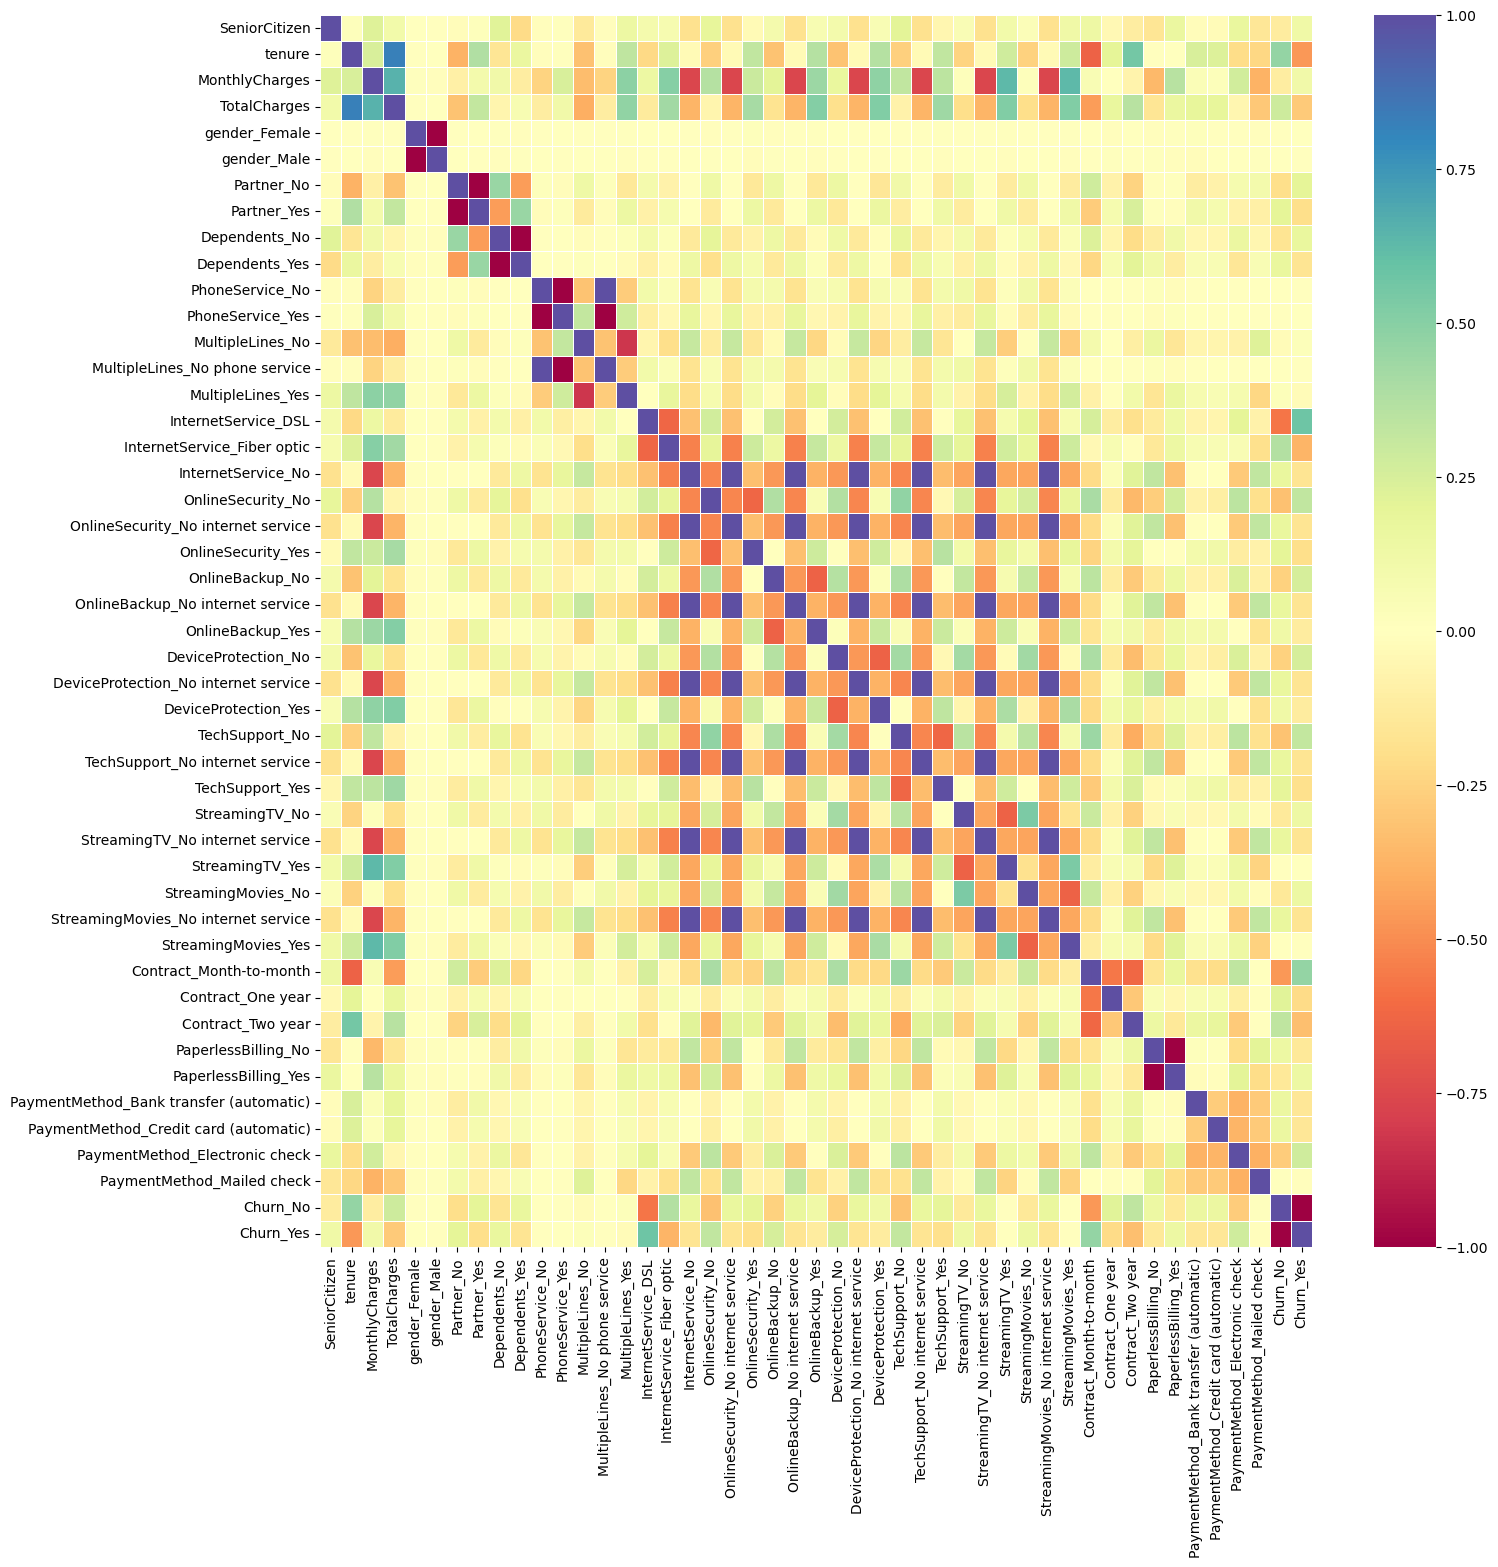

In [29]:
plt.figure(figsize = (16,16))
ax = sns.heatmap(pinky_corr2_dum.corr(), cmap='Spectral', linewidths=.5)

PREPARATION BDD POUR ML DE CLUSTERING

proposer un scoring pour chaque client en fonction de ces caractéristiques, afin de prioriser les appels vers les clients les plus à risque.

prédire colonne churn = OUI / NON selon les autres colonnes que nous aurons au-préalable transformer en données chiffrées
Etant donné que la plupart des colonnes soit soit des booléens soit des colonnes où il y a max 4 valeurs uniques : on peut faite du factorize

In [30]:
#travail preparatoire de la BDD
#valeurs manquantes
pinky.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [31]:
#remplacer les valeurs manquantes par 0
pinky['TotalCharges'].fillna(0, inplace=True)

In [32]:
#isoler valeur expliquée (à prédire) => churn et valeurs explicatives => toutes les autres
X = pinky.drop(columns=['customerID','Churn'])
y = pinky['Churn']

In [33]:
X.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [34]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [35]:
#transformer les données en valeurs numériques
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [36]:
X_numeric = X.apply(lambda x: pd.factorize(x)[0])

In [37]:
X_numeric.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1
2,1,0,1,0,2,1,1,1,1,0,0,0,0,0,0,0,1,2,2
3,1,0,1,0,3,0,0,0,1,1,1,1,0,0,1,1,2,3,3
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4


In [38]:
X_numeric.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.516967,0.299588,30.520659,0.903166,1.325004,0.706091,0.720006,0.871788,0.777226,0.723555,0.817691,0.821241,0.690473,0.407781,1.315633,565.766719,3159.651853
std,0.500013,0.368612,0.499748,0.458110,21.350145,0.295752,0.642730,0.800597,0.796885,0.738369,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,411.690879,1895.182288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,203.500000,1505.500000
50%,1.000000,0.000000,1.000000,0.000000,29.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,485.000000,3119.000000
75%,1.000000,0.000000,1.000000,1.000000,49.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,865.500000,4788.500000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000


In [39]:
#partitionner les données entre train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, train_size=0.75)

In [40]:
#normaliser les données
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

In [41]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

Je vais partir sur le modele de ML de Régression Logistique dont le principe est de prédire une probabilité (ici la proba que le client va ou non résilier son abonnement)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train_norm, y_train)

In [43]:
#evaluer le modele
train_score = model.score(X_train_norm, y_train)
print(f"le score de détermination R2 du modele de ML sur le jeu d'entrainement est de {train_score}")
test_score = model.score(X_test_norm, y_test)
print(f"le score de détermination R2 du modele de ML sur le jeu de test est de {test_score}")

le score de détermination R2 du modele de ML sur le jeu d'entrainement est de 0.8492995077622113
le score de détermination R2 du modele de ML sur le jeu de test est de 0.8233957978421351


score plutot correct et pas d'overfitting
On peut passer à la partie prédiction

In [44]:
#enlever les clients ayant résilié du fichier client et passer les autres sous le modele ML ci-dessus pour en tirer un score
#classer ensuite le fichier par score du plus élevé au plus bas

In [45]:
non_churning_customers = pinky.loc[pinky['Churn'] == 'No', :]

In [46]:
non_churning_customers.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [47]:
non_churning_X = non_churning_customers.drop(columns=['customerID', 'Churn'])
non_churning_y = non_churning_customers['Churn']

In [48]:
non_churning_X_num = non_churning_X.apply(lambda x: pd.factorize(x)[0])
non_churning_X_num_norm = scaler.transform(non_churning_X_num)

In [49]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [50]:
#prediction sur le fichier
non_churning_customers[['proba_churn_NO', 'proba_churn_YES']] = model.predict_proba(non_churning_X_num_norm)

C:\Users\MAITE\AppData\Local\Temp\ipykernel_19576\1676336024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_churning_customers[['proba_churn_NO', 'proba_churn_YES']] = model.predict_proba(non_churning_X_num_norm)
C:\Users\MAITE\AppData\Local\Temp\ipykernel_19576\1676336024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_churning_customers[['proba_churn_NO', 'proba_churn_YES']] = model.predict_proba(non_churning_X_num_norm)


In [51]:
non_churning_customers.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,proba_churn_NO,proba_churn_YES
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0.521097,0.478903
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Fiber optic,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.710021,0.289979
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0.977162,0.022838


In [52]:
#ne garder que la probabilité churn = YES
non_churning_customers = non_churning_customers.drop(columns='proba_churn_NO')

In [53]:
non_churning_customers['proba_churn_YES'].describe()

count    4824.000000
mean        0.125624
std         0.259596
min         0.000862
25%         0.008900
50%         0.023322
75%         0.069504
max         0.995416
Name: proba_churn_YES, dtype: float64

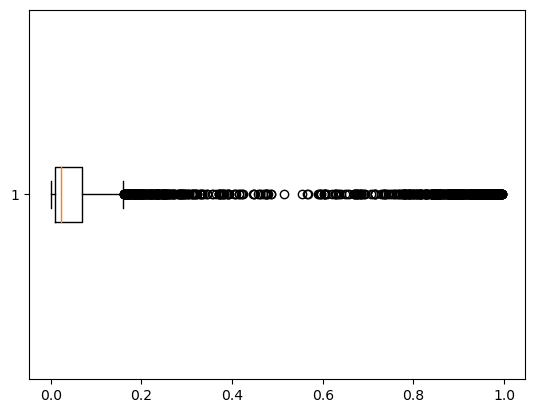

In [54]:
plt.boxplot(non_churning_customers['proba_churn_YES'], vert=False)
plt.title('');

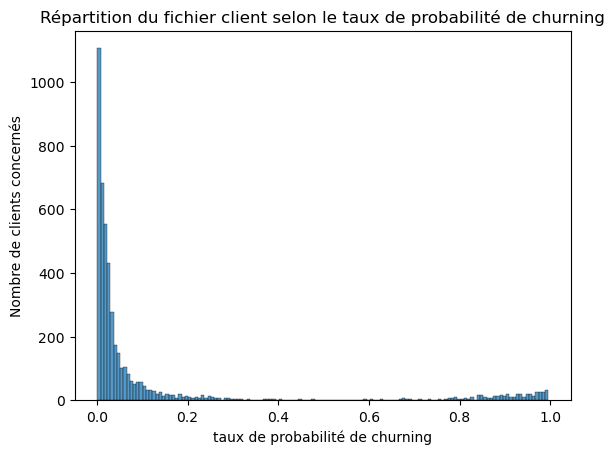

In [55]:
sns.histplot(data=non_churning_customers, x='proba_churn_YES')
plt.xlabel("taux de probabilité de churning")
plt.ylabel("Nombre de clients concernés")
plt.title("Répartition du fichier client selon le taux de probabilité de churning");

In [56]:
import plotly.express as px
fig = px.histogram(non_churning_customers, x='proba_churn_YES', 
                   labels={"proba_churn_YES":"taux de probabilité de churning", "count":"Nombre de clients concernés"},
                   title="Répartition du fichier client selon le taux de probabilité de churning")
fig.show()

Ce qui est rassurant c'est que la grande majorité du fichier client a moins de 20% de probabilité de churning

In [57]:
#isoler les outliers avec probabilité sup à 0.8
non_churning_customers.loc[non_churning_customers['proba_churn_YES'] >=0.8, :].sort_values(by='proba_churn_YES', ascending=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,proba_churn_YES
813,3551-GAEGL,Male,0,Yes,Yes,34,No,No phone service,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),30.40,938.65,No,0.995416
5340,5032-USPKF,Female,0,No,No,38,Yes,Yes,DSL,Yes,...,No,Yes,Yes,One year,No,Bank transfer (automatic),84.10,3187.65,No,0.995351
4017,9473-CBZOP,Female,0,No,No,28,Yes,Yes,DSL,Yes,...,No,No,No,One year,No,Mailed check,59.00,1654.45,No,0.995318
502,3957-HHLMR,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,No,No,Yes,One year,No,Bank transfer (automatic),65.20,4543.15,No,0.995029
5666,8318-LCNBW,Male,0,Yes,No,35,No,No phone service,DSL,Yes,...,No,Yes,Yes,One year,No,Credit card (automatic),53.15,1930.90,No,0.995002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,6789-HJBWG,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,49.40,611.65,No,0.807528
2249,5527-ACHSO,Female,0,No,No,11,Yes,No,DSL,No,...,Yes,Yes,Yes,Month-to-month,No,Mailed check,70.50,829.30,No,0.805118
1150,8807-ARQET,Female,0,No,No,41,No,No phone service,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,40.35,1677.85,No,0.804928
149,3466-BYAVD,Male,0,Yes,Yes,15,Yes,No,DSL,No,...,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.50,1071.40,No,0.804098


Voici la liste de 354 clients dont le taux de probabilité qu'ils vont bientôt résilier est à 80% est plus.

In [58]:
most_at_risk_customers = non_churning_customers.loc[non_churning_customers['proba_churn_YES'] >=0.8, :].sort_values(by='proba_churn_YES', ascending=False)

In [59]:
most_at_risk_customers.to_csv(r"C:/Users/MAITE/Wild Code School/Business Cases/Churning telecom/most_at_risk_customers.csv", index=False)

In [60]:
most_at_risk_customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,proba_churn_YES
813,3551-GAEGL,Male,0,Yes,Yes,34,No,No phone service,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),30.40,938.65,No,0.995416
5340,5032-USPKF,Female,0,No,No,38,Yes,Yes,DSL,Yes,...,No,Yes,Yes,One year,No,Bank transfer (automatic),84.10,3187.65,No,0.995351
4017,9473-CBZOP,Female,0,No,No,28,Yes,Yes,DSL,Yes,...,No,No,No,One year,No,Mailed check,59.00,1654.45,No,0.995318
502,3957-HHLMR,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,No,No,Yes,One year,No,Bank transfer (automatic),65.20,4543.15,No,0.995029
5666,8318-LCNBW,Male,0,Yes,No,35,No,No phone service,DSL,Yes,...,No,Yes,Yes,One year,No,Credit card (automatic),53.15,1930.90,No,0.995002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,6789-HJBWG,Female,0,No,No,12,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,49.40,611.65,No,0.807528
2249,5527-ACHSO,Female,0,No,No,11,Yes,No,DSL,No,...,Yes,Yes,Yes,Month-to-month,No,Mailed check,70.50,829.30,No,0.805118
1150,8807-ARQET,Female,0,No,No,41,No,No phone service,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,40.35,1677.85,No,0.804928
149,3466-BYAVD,Male,0,Yes,Yes,15,Yes,No,DSL,No,...,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.50,1071.40,No,0.804098


TENTATIVE DE CLUSTERING

In [61]:
from sklearn.cluster import KMeans

Comme on sait pas ce qu'on cherche on fait pas de y par contre il faut retravailler le df en numeric et normaliser

In [67]:
df_cluster = pinky.drop(columns='customerID')
df_cluster_numeric = df_cluster.apply(lambda x: pd.factorize(x)[0])

In [68]:
from sklearn.preprocessing import StandardScaler
new_scaler = StandardScaler().fit(df_cluster_numeric)

In [69]:
df_cluster_numeric_norm = new_scaler.transform(df_cluster_numeric)

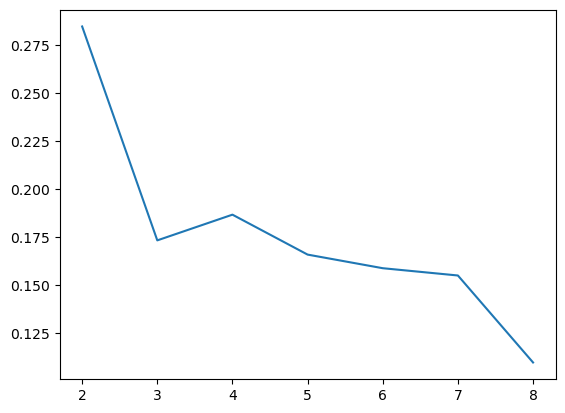

In [72]:
#methode silhouette pour définir le meilleur nombre de cluster
from sklearn.metrics import silhouette_score
cluster_list = []
silhouette_list = []
for k in range(2,9):
    modelKM = KMeans(n_clusters=k, random_state=3, init='k-means++', n_init='auto')
    modelKM.fit(df_cluster_numeric_norm)
    cluster_list.append(k)
    silhouette_list.append(silhouette_score(df_cluster_numeric_norm, modelKM.labels_))

plt.plot(cluster_list, silhouette_list) ;

Le score le plus élevé, c'est le nombre optimal de clusters. Je dirais donc 2 clusters
Après le score il est pas foufou